In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-sep-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-sep-2022/train.csv
/kaggle/input/tabular-playground-series-sep-2022/test.csv


In [42]:
# modules input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set(rc={'figure.figsize':(24, 20)})

# 2. Data

In [43]:
# data input
train_data = pd.read_csv('/kaggle/input/tabular-playground-series-sep-2022/train.csv', index_col=0)
test_data = pd.read_csv('/kaggle/input/tabular-playground-series-sep-2022/test.csv', index_col=0)

In [44]:
train_data

,date,country,store,product,num_sold
row_id,,,,,
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...
70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158


In [45]:
train_data.shape

(70128, 5)

In [46]:
print('Missing Values')
train_data.isna().sum().sum()

Missing Values


0

In [47]:
print('Duplicated Values')
train_data.duplicated().sum()

Duplicated Values


0

In [48]:
train_data.dtypes

date        object
country     object
store       object
product     object
num_sold     int64
dtype: object

In [49]:
train_data['num_sold'].describe()

count    70128.000000
mean       194.296986
std        126.893874
min         19.000000
25%         95.000000
50%        148.000000
75%        283.000000
max        986.000000
Name: num_sold, dtype: float64

In [50]:
train_data['date'] = pd.to_datetime(train_data['date'])

In [51]:
train_data.dtypes

date        datetime64[ns]
country             object
store               object
product             object
num_sold             int64
dtype: object

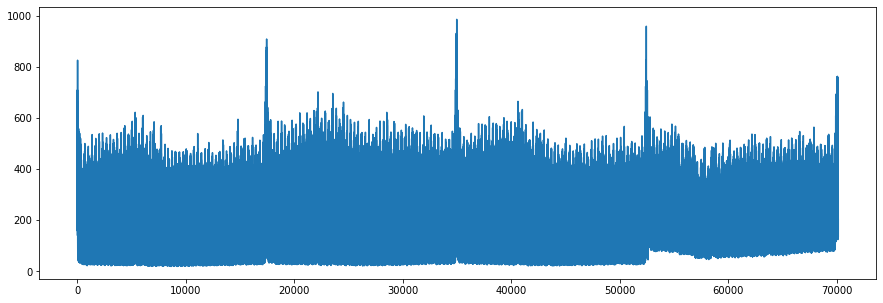

In [52]:
# Overall
plt.figure(figsize=(15,5))
plt.plot(train_data['num_sold'])

Initially split into 48 separate data for visualization


### General Visualization

In [53]:
countries = ['Belgium', 'France', 'Germany', 'Italy', 'Poland', 'Spain']
stores = ['KaggleMart', 'KaggleRama']
products = ['Kaggle Advance Techniques', 'Kaggle Getting Started', 'Kaggle Recipe Book', 'Kaggle for Kids: One Smart Goose']

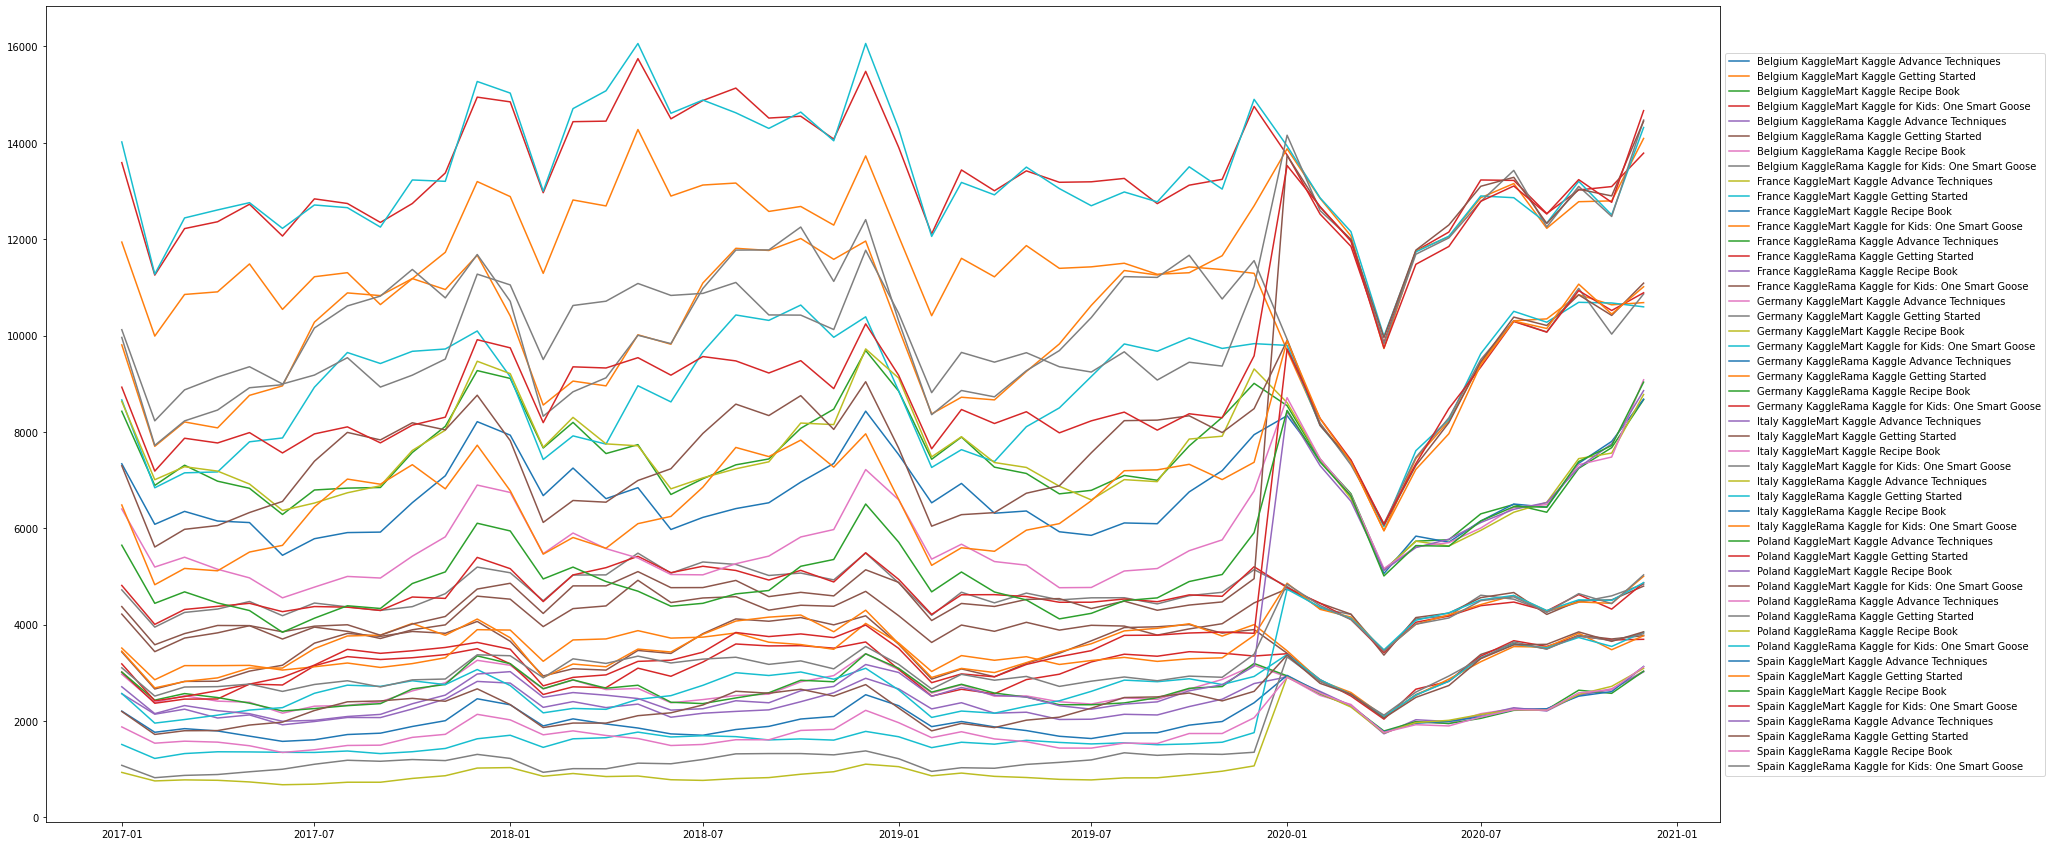

In [54]:
plt.figure(figsize=(30,15))
for country in countries:
    for store in stores:
        for product in products:
            temp = train_data[(train_data['country'] == country) & (train_data['store'] == store) & (train_data['product'] == product)]
            month = temp['date'].dt.to_period('M')
            temp_month = temp.groupby(month).sum()
            temp_month.index = temp_month.index.to_timestamp()
            plt.plot(temp_month, label=f'{country} {store} {product}')
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

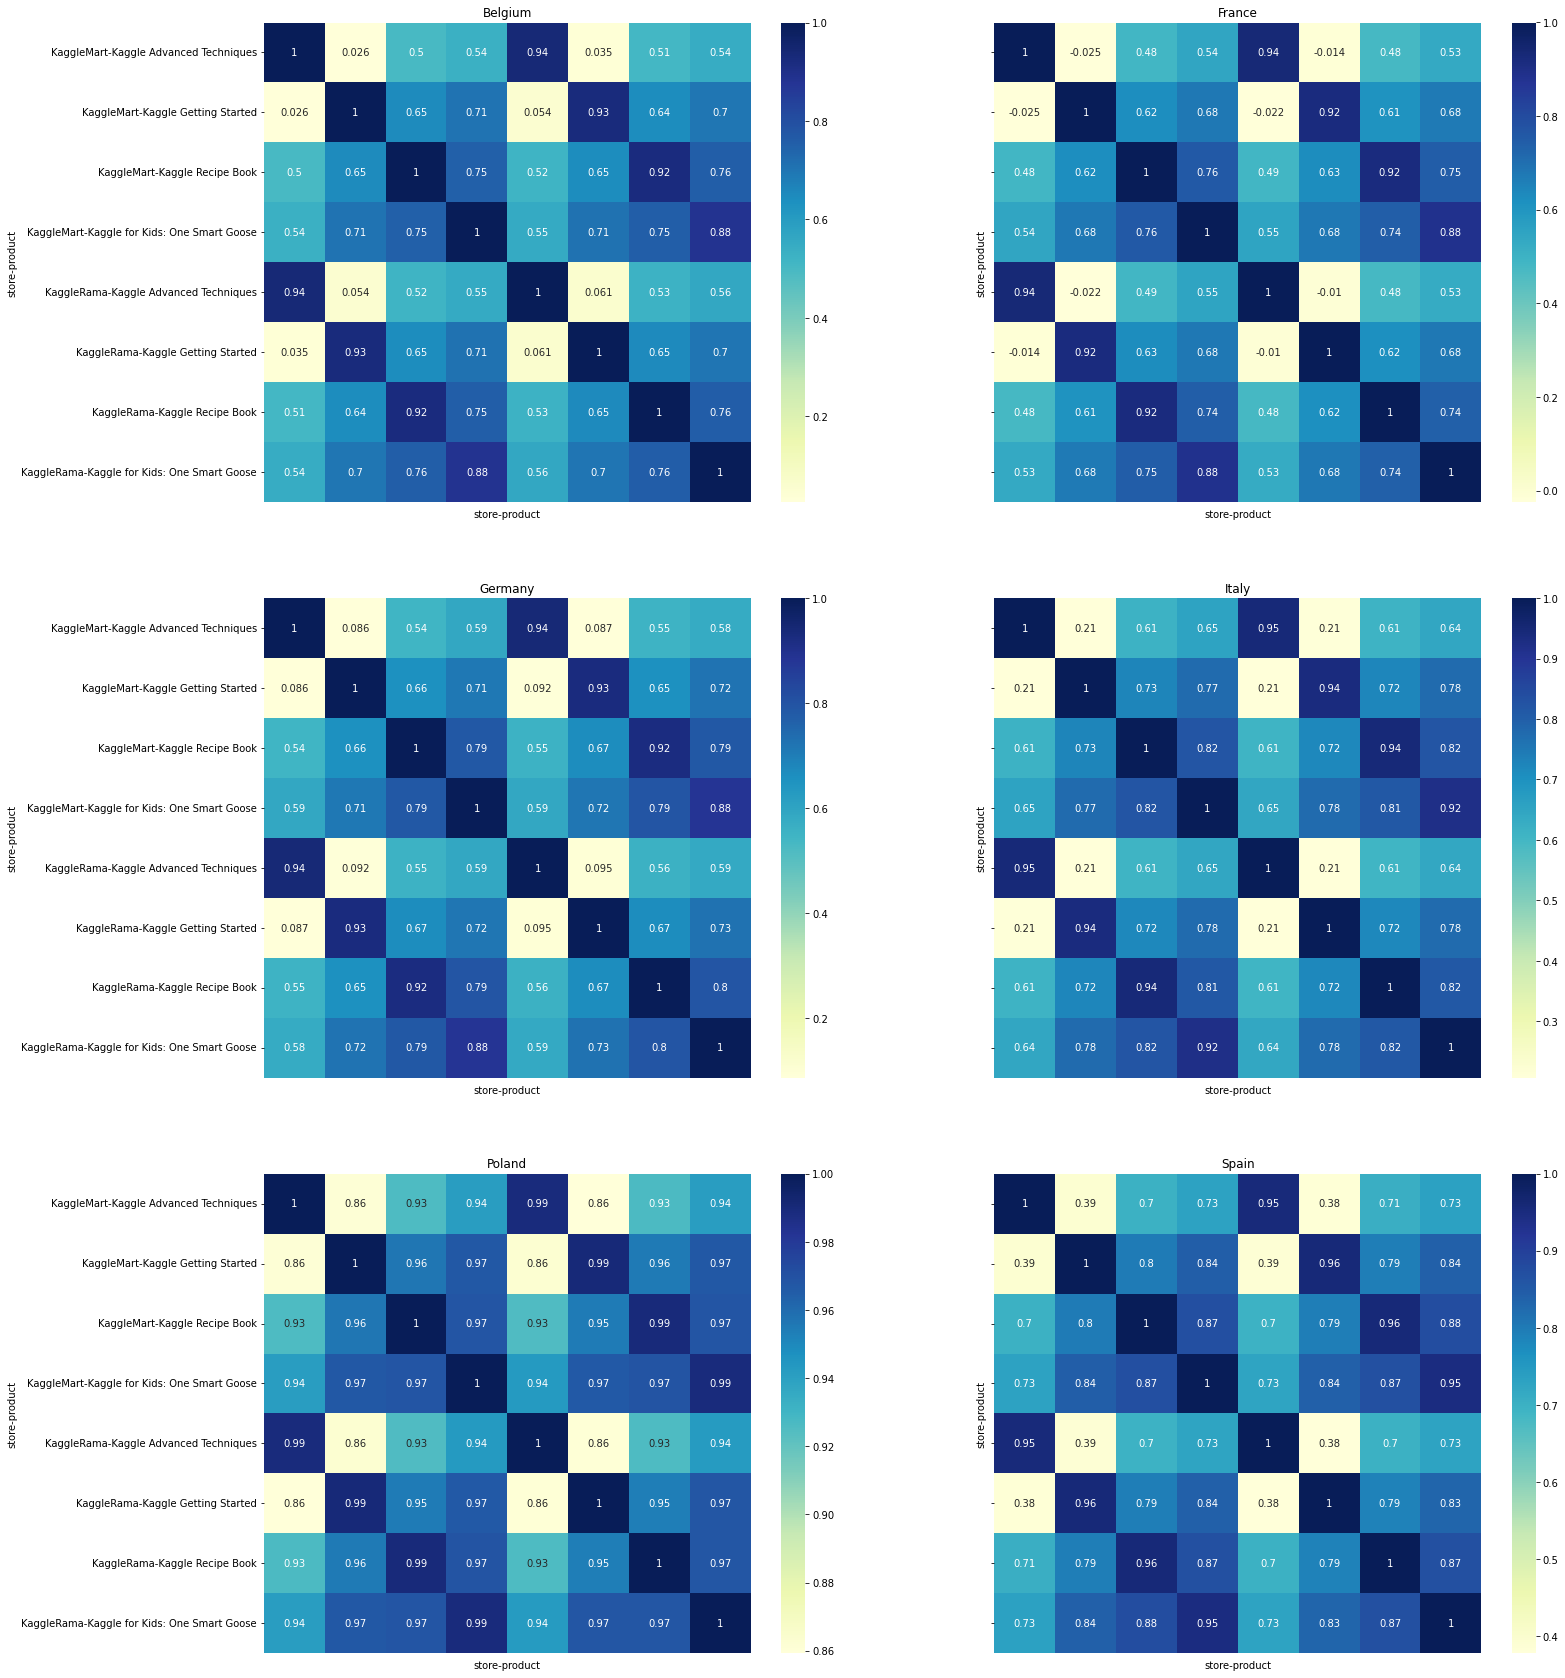

In [55]:
fig, axes = plt.subplots(3, 2, figsize=(24,30), sharey=True, sharex=True)

countries = ['Belgium', 'France', 'Germany', 'Italy', 'Poland', 'Spain', ]
for ax, each in zip(axes.ravel(), countries):
    temp = train_data[train_data['country'] == each]
    corr_mat = temp.pivot_table(index=['date'], columns=['store', 'product'], values='num_sold').corr()
    sns.heatmap(corr_mat, annot=True, cmap='YlGnBu', xticklabels=False, ax=ax)
    ax.set_title(each)

the overall trend through all time looks close especially after 2020. 
it is hard to distinguish from each country, so country by country



The correlation heatmap shows same product at different stores are highly correlated


### Correlations between products 

<AxesSubplot:xlabel='product', ylabel='product'>

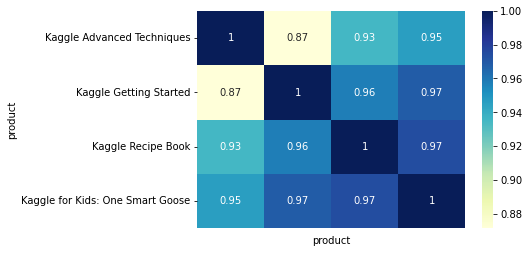

In [56]:
sns.heatmap(train_data.pivot(index=['date','country', 'store'], columns='product', values='num_sold').corr(), annot=True, cmap='YlGnBu', xticklabels=False)

### Correlations between countries

<AxesSubplot:xlabel='country', ylabel='country'>

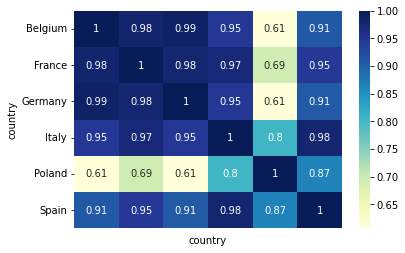

In [57]:
sns.heatmap (train_data.pivot_table(index=['date', 'store', 'product'], columns='country', values='num_sold').corr(), cmap='YlGnBu', xticklabels=False, annot=True)

### Correlation between stores

<AxesSubplot:xlabel='store', ylabel='store'>

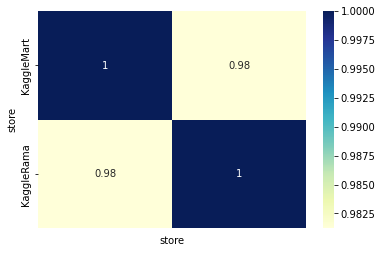

In [58]:
sns.heatmap(train_data.pivot_table(index=['date', 'country', 'product'], columns='store', values='num_sold').corr(), annot=True, cmap='YlGnBu', xticklabels=False)

### Belgium

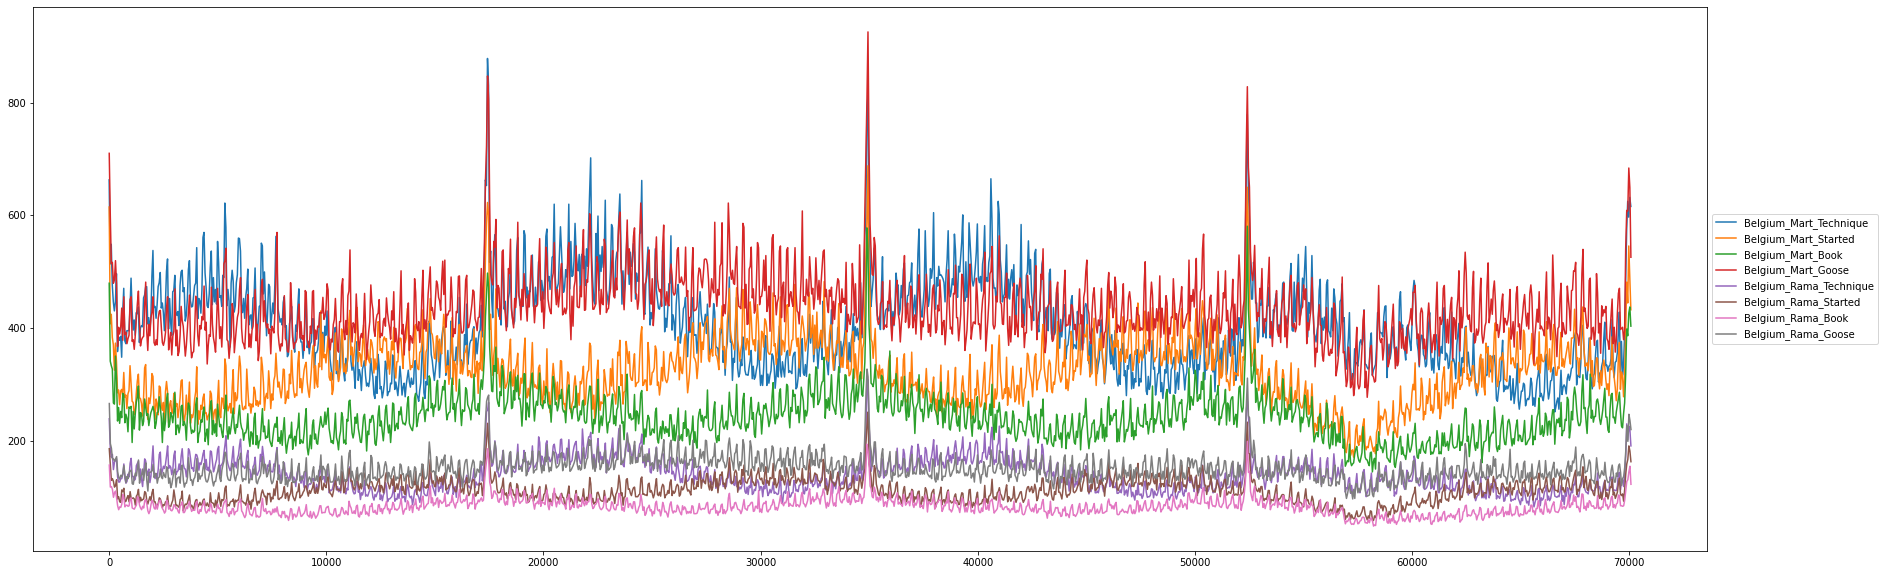

In [59]:
# split on several columns
# take Belgium as example
plt.figure(figsize=(30,10))
Belgium = train_data[train_data['country'] == 'Belgium']
# plt.plot(Belgium.num_sold)
Belgium_Mart = Belgium[Belgium['store'] == 'KaggleMart']
Belgium_Rama = Belgium[Belgium['store'] == 'KaggleRama']
# plt.plot(Belgium_Mart.num_sold)
# plt.plot(Belgium_Rama.num_sold)
Belgium_Mart_Technique = Belgium_Mart[Belgium_Mart['product'] == 'Kaggle Advanced Techniques']
Belgium_Mart_Started = Belgium_Mart[Belgium_Mart['product'] == 'Kaggle Getting Started']
Belgium_Mart_Book = Belgium_Mart[Belgium_Mart['product'] == 'Kaggle Recipe Book']
Belgium_Mart_Goose = Belgium_Mart[Belgium_Mart['product'] == 'Kaggle for Kids: One Smart Goose']
Belgium_Rama_Technique = Belgium_Rama[Belgium_Rama['product'] == 'Kaggle Advanced Techniques']
Belgium_Rama_Started = Belgium_Rama[Belgium_Rama['product'] == 'Kaggle Getting Started']
Belgium_Rama_Book = Belgium_Rama[Belgium_Rama['product'] == 'Kaggle Recipe Book']
Belgium_Rama_Goose = Belgium_Rama[Belgium_Rama['product'] == 'Kaggle for Kids: One Smart Goose']
Belgium_products = {'Belgium_Mart_Technique': Belgium_Mart_Technique, 'Belgium_Mart_Started': Belgium_Mart_Started, 'Belgium_Mart_Book': Belgium_Mart_Book, 'Belgium_Mart_Goose': Belgium_Mart_Goose, 
                    'Belgium_Rama_Technique': Belgium_Rama_Technique, 'Belgium_Rama_Started': Belgium_Rama_Started, 'Belgium_Rama_Book': Belgium_Rama_Book, 'Belgium_Rama_Goose': Belgium_Rama_Goose}
for key, value in Belgium_products.items():
    plt.plot(value.num_sold, label=key)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# plt.plot(Belgium_Mart_Technique.num_sold)


In [60]:
France = train_data[train_data['country'] == 'France']
France.head()

,date,country,store,product,num_sold
row_id,,,,,
8,2017-01-01,France,KaggleMart,Kaggle Advanced Techniques,610
9,2017-01-01,France,KaggleMart,Kaggle Getting Started,463
10,2017-01-01,France,KaggleMart,Kaggle Recipe Book,407
11,2017-01-01,France,KaggleMart,Kaggle for Kids: One Smart Goose,672
12,2017-01-01,France,KaggleRama,Kaggle Advanced Techniques,220


In [61]:
France_pivot = France.pivot_table(index='date', columns=['country', 'store', 'product'], values='num_sold')




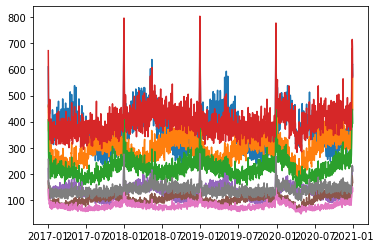

In [62]:

for col in France_pivot.columns:
    plt.plot(France_pivot[col])